In [58]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_excel("https://github.com/Rodrigojaure92/30daychartchallenge/raw/refs/heads/main/Day17-networks/ventas.xlsx")
data

,Categoria,Unidades_vendidas
0,Electrónica,12000
1,Ropa,8500
2,Alimentos,15000
3,Hogar,9800
4,Deportes,11200


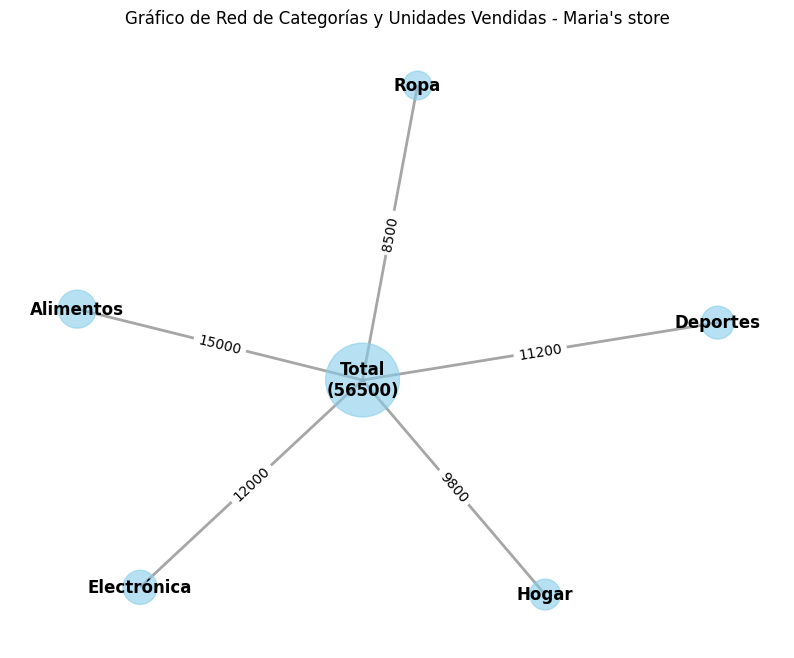

In [59]:
total_unidades = data['Unidades_vendidas'].sum()
G = nx.Graph()
G.add_node("Total", size=total_unidades)

# Agregar nodos para cada categoría y conectarlos con el nodo "Total"
for index, row in data.iterrows():
    G.add_node(row['Categoria'], size=row['Unidades_vendidas'])
    G.add_edge("Total", row['Categoria'], weight=row['Unidades_vendidas'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42, k=0.5)
sizes = [G.nodes[node]['size']*0.05 for node in G]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
node_labels = {node: f"Total\n({total_unidades})" if node == "Total" else node for node in G}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold', font_color='black')

# Dibujar las etiquetas de las aristas con solo el valor de Unidades_vendidas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.title("Gráfico de Red de Categorías y Unidades Vendidas - Maria's store")
plt.axis('off')
plt.show()